# Boston Housing Exercise - Polynomial Regression

**Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression**

In [1]:
# http://lib.stat.cmu.edu/datasets/boston

In [2]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = pd.DataFrame(boston.data, columns= boston.feature_names)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Create a simple linear regression

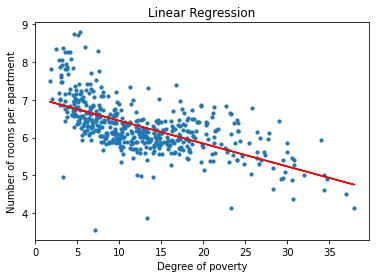

0.37676059461161104
0.37676059461161104


In [6]:
# Simple Linear Regression RM(LSTAT)
x = data.LSTAT
y = data.RM
x = x[:, np.newaxis]
y = y[:, np.newaxis]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.title(f'Linear Regression')
plt.xlabel('Degree of poverty')
plt.ylabel('Number of rooms per apartment')
plt.show()
plt.show()
print(model.score(x,y))
print(metrics.r2_score(y,y_pred))

### Create a polynomial regression

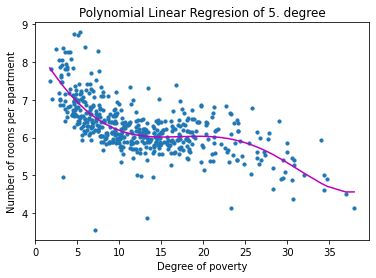

rmse: 0.5011542176589909
r2: 0.4902415496332979


In [7]:
#Simple Linear Polynomyal Regression
x = data.LSTAT
y = data.RM
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(metrics.mean_squared_error(y,y_poly_pred))
r2 = metrics.r2_score(y,y_poly_pred)


plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title(f'Polynomial Linear Regresion of {5}. degree')
plt.xlabel('Degree of poverty')
plt.ylabel('Number of rooms per apartment')
plt.show()
plt.show()
print(f'rmse: {rmse}')
print(f'r2: {r2}')

### Loop over the same prediction algorithm for multiple degrees of polynoms

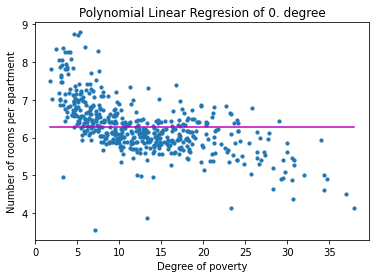

rmse: 0.7019225143345689
r2: 0.0


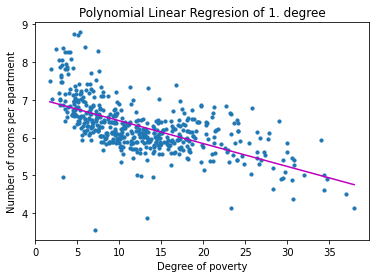

rmse: 0.5541363311843189
r2: 0.37676059461161104


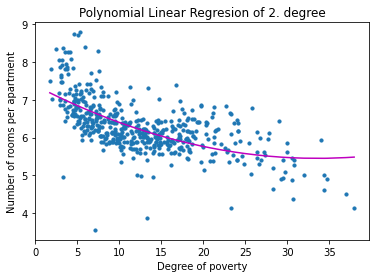

rmse: 0.5427401242828556
r2: 0.4021317178184489


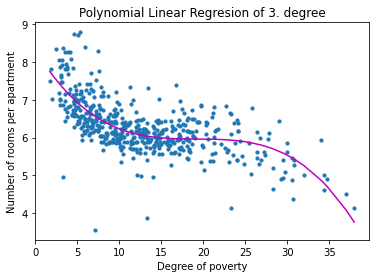

rmse: 0.5055996064714376
r2: 0.4811580188009251


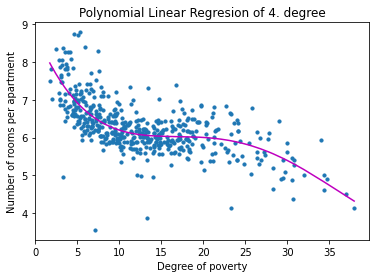

rmse: 0.5019673887647249
r2: 0.48858594292315227


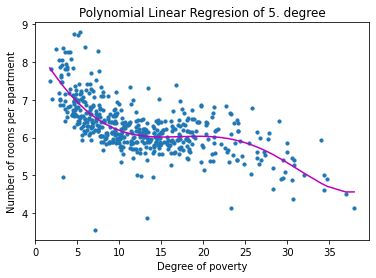

rmse: 0.5011542176589909
r2: 0.4902415496332979


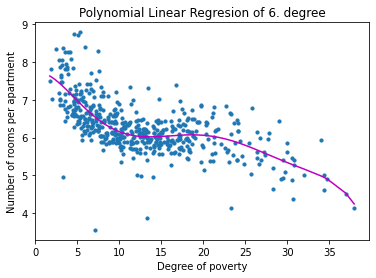

rmse: 0.49949600606233185
r2: 0.49360933107475047


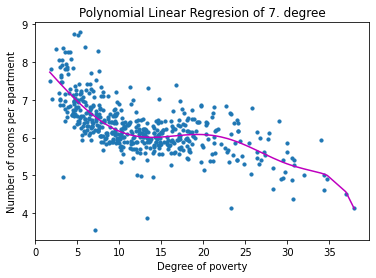

rmse: 0.49918066373454756
r2: 0.494248519391275


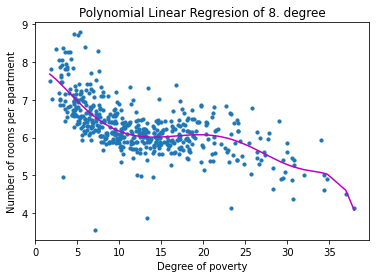

rmse: 0.499110446203786
r2: 0.49439079302094746


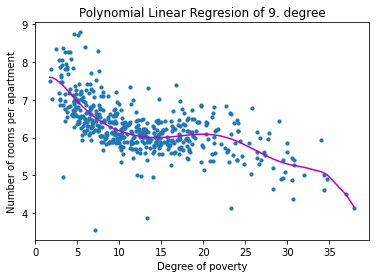

rmse: 0.4989151392467866
r2: 0.49478641557566416


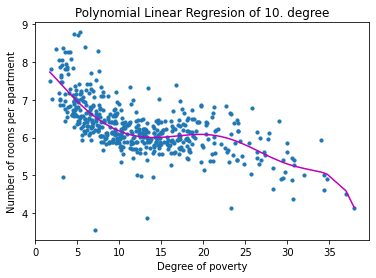

rmse: 0.4990715546354213
r2: 0.49446958587757595


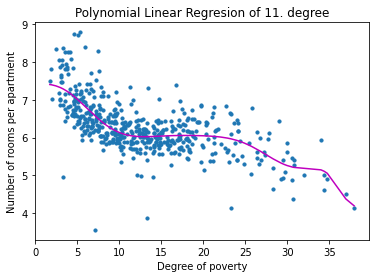

rmse: 0.5012660074075351
r2: 0.49001410617286423


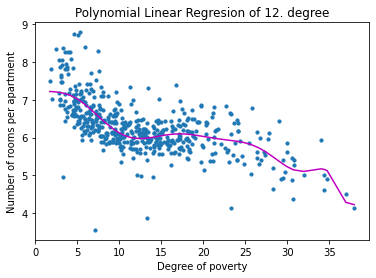

rmse: 0.5060144737710729
r2: 0.4803062029358556


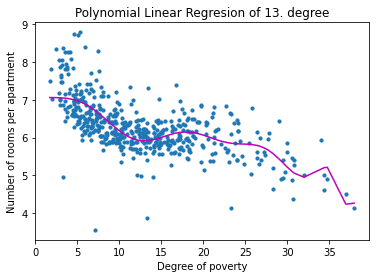

rmse: 0.5144881190360121
r2: 0.46275503401782725


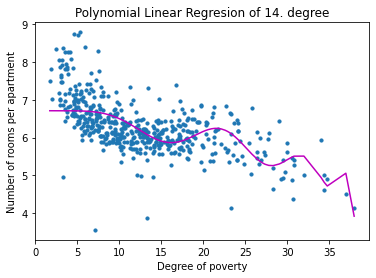

rmse: 0.5659198206299885
r2: 0.34997289826023215


In [8]:
for i in range(15):
    x = data.LSTAT
    y = data.RM
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]

    polynomial_features= PolynomialFeatures(degree=i)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(metrics.mean_squared_error(y,y_poly_pred))
    r2 = metrics.r2_score(y,y_poly_pred)


    plt.scatter(x, y, s=10)
# sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.title(f'Polynomial Linear Regresion of {i}. degree')
    plt.xlabel('Degree of poverty')
    plt.ylabel('Number of rooms per apartment')
    plt.show()
    plt.show()
    print(f'rmse: {rmse}')
    print(f'r2: {r2}')

### Try the same algorithm but now split the dataset into train and test set 

In [9]:
#reshape and split the dataset
X = np.asarray(data.copy().LSTAT)
y = np.asarray(data.copy().RM)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train = X_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
y_test = y_test[:, np.newaxis]

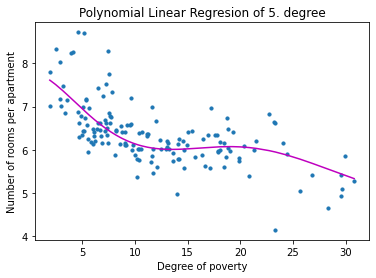

rmse: 0.5210693897347983
r2: 0.47622869086059694


In [10]:
polynomial_features= PolynomialFeatures(degree=6)
#make polynomial transformation for train and test X
x_train_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(X_test)

#train model with training data
model = LinearRegression()
model.fit(x_train_poly, y_train)

#use test data to predict test values
y_poly_pred = model.predict(x_test_poly)

#calculate metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_poly_pred))
r2 = metrics.r2_score(y_test,y_poly_pred)


plt.scatter(X_test, y_test, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,y_poly_pred), key=sort_axis)
a,b = zip(*sorted_zip)
plt.plot(a, b, color='m')
plt.title(f'Polynomial Linear Regresion of 5. degree')
plt.xlabel('Degree of poverty')
plt.ylabel('Number of rooms per apartment')
plt.show()
plt.show()
print(f'rmse: {rmse}')
print(f'r2: {r2}')

### Iterate over multiple polynomial regressions for the split dataset

In [11]:
# create empty dataframe poly_models in which results will be stored
poly_models = pd.DataFrame(columns = ['Poly','r2', 'rsme'])
#reshape and split the dataset
X = np.asarray(data.copy().LSTAT)
y = np.asarray(data.copy().RM)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train = X_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
y_test = y_test[:, np.newaxis]

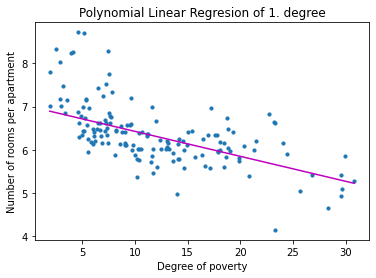

RMSE: 0.5678674660985212
r2: 0.3779224065159068




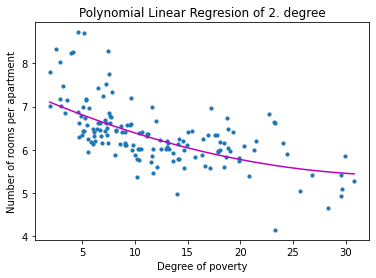

RMSE: 0.552550966407151
r2: 0.4110271596901742




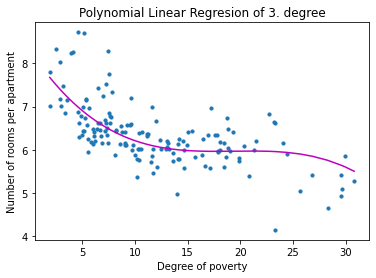

RMSE: 0.5283574800662917
r2: 0.46147446221878474




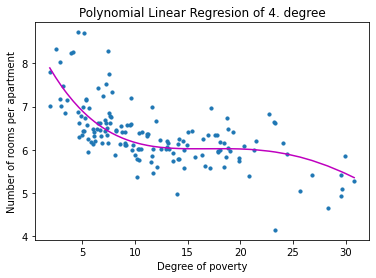

RMSE: 0.5251108043446472
r2: 0.46807244171226814




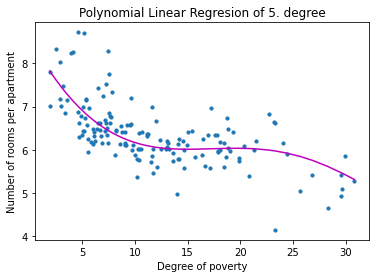

RMSE: 0.5235196549742144
r2: 0.47129116766979506




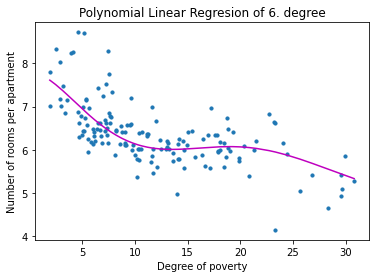

RMSE: 0.5210693897347983
r2: 0.47622869086059694




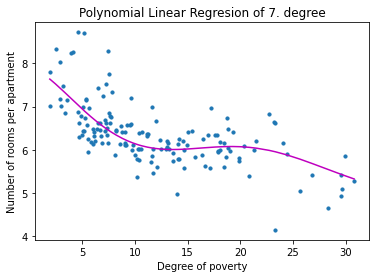

RMSE: 0.520670312443238
r2: 0.4770306769120023




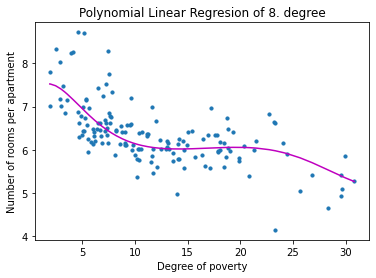

RMSE: 0.5217634744429409
r2: 0.4748323939787533




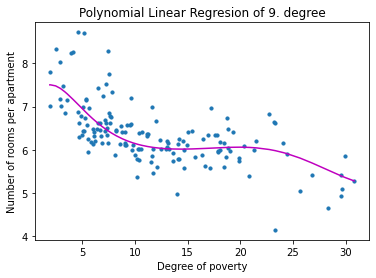

RMSE: 0.5215918730229082
r2: 0.4751777791648686




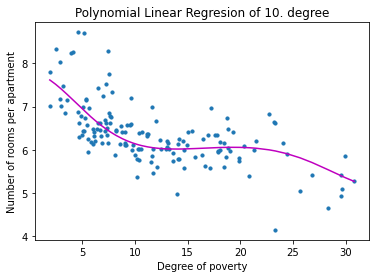

RMSE: 0.5215205231933725
r2: 0.4753213527777501




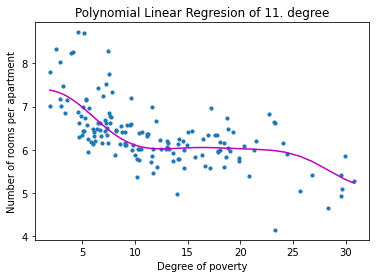

RMSE: 0.5248606215694239
r2: 0.4685791820408688




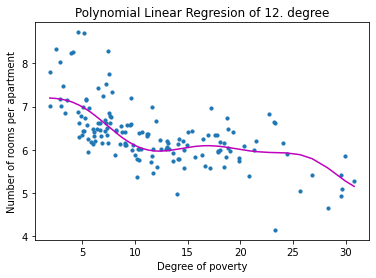

RMSE: 0.5295000417897965
r2: 0.4591428440438735




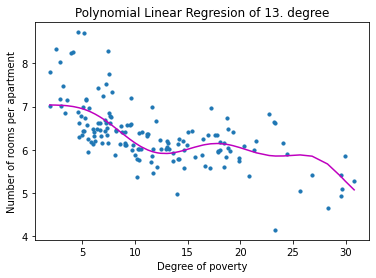

RMSE: 0.5368388463999446
r2: 0.44404652187335447




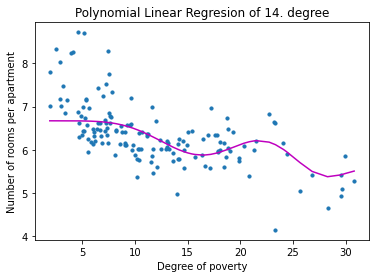

RMSE: 0.5803988620696217
r2: 0.35016411926834223




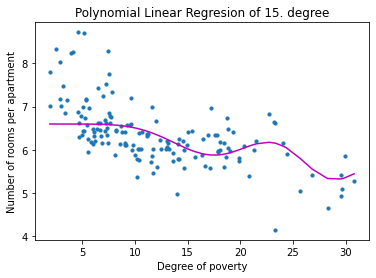

RMSE: 0.6006585417687311
r2: 0.30400535601093925




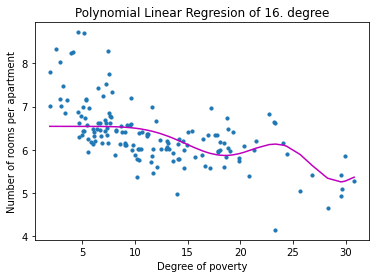

RMSE: 0.6173762381056397
r2: 0.2647239789260082




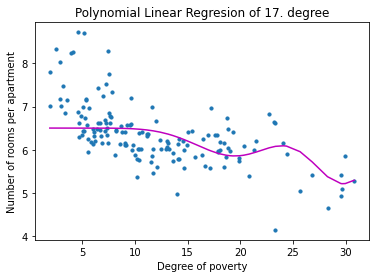

RMSE: 0.6298068676646323
r2: 0.23481690485193418




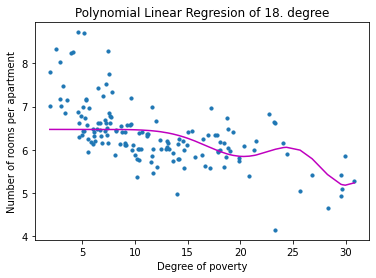

RMSE: 0.6389910809563836
r2: 0.21233748951194076




In [14]:
for i in range(1,19):
    polynomial_features= PolynomialFeatures(degree=i)
    #make polynomial transformation for train and test X
    x_train_poly = polynomial_features.fit_transform(X_train)
    x_test_poly = polynomial_features.fit_transform(X_test)

    #train model with training data
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

#use test data to predict test values
    y_poly_pred = model.predict(x_test_poly)

#calculate metrics
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_poly_pred))
    r2 = metrics.r2_score(y_test,y_poly_pred)


    plt.scatter(X_test, y_test, s=10)
# sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_test,y_poly_pred), key=sort_axis)
    a,b = zip(*sorted_zip)
    plt.plot(a, b, color='m')
    plt.title(f'Polynomial Linear Regresion of {i}. degree')
    plt.xlabel('Degree of poverty')
    plt.ylabel('Number of rooms per apartment')
    plt.show()
    plt.show()
    print(f'RMSE: {rmse}')
    print(f'r2: {r2}')
    print()
    print()
    
    #append models dataframe
    poly_models.loc[len(poly_models)] = [int(i), r2, rmse]

In [13]:
print(f"The best polynom seems to be {poly_models.sort_values(['rsme','r2'])[:1].Poly.values[0]}")

The best polynom seems to be 7.0


### Do the same but now split the training set into training and validation to estimate if model is overfitting